# NFL offense performance and analysis

Author: Shengkai Yang

Course Project, UC Irvine, Math 10, F22

## Introduction

In this project, I want to use machine learning to analyze how some specific data which affect NFL football games. Also, I want to know how these data affect teams performance and predict them.

## Main part of project

You can either have all one section or divide into multiple sections.  To make new sections, use `##` in a markdown cell.  Double-click this cell for an example of using `##`

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
w4 = pd.read_csv("nfloffenseweek4.csv")

In [3]:
w4

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,1,Detroit Lions,4,140,1747,269,6.5,4,1,90,...,656,7,5.9,26,23,188,7,45.8,8.3,53.17
1,2,Kansas City Chiefs,4,129,1539,257,6.0,4,2,95,...,468,4,4.5,23,19,156,10,50.0,7.1,57.85
2,3,Baltimore Ravens,4,119,1437,230,6.2,5,1,77,...,568,3,5.4,31,17,114,7,42.2,11.1,32.97
3,4,Philadelphia Eagles,4,115,1742,285,6.1,2,0,98,...,661,10,4.3,40,26,193,9,40.0,4.4,44.88
4,5,Buffalo Bills,4,114,1650,275,6.0,7,4,99,...,462,2,4.8,29,24,167,7,47.5,17.5,49.56
5,6,Cleveland Browns,4,105,1539,281,5.5,3,1,96,...,749,7,5.0,46,26,184,7,46.3,7.3,40.78
6,7,Jacksonville Jaguars,4,105,1346,250,5.4,6,4,83,...,441,3,4.0,23,22,157,8,40.9,13.6,17.69
7,8,Atlanta Falcons,4,103,1396,236,5.9,8,4,86,...,672,6,5.1,36,16,114,12,44.2,18.6,30.77
8,9,Miami Dolphins,4,98,1444,227,6.4,4,0,80,...,277,2,3.5,15,22,132,9,42.1,10.5,46.01
9,10,Las Vegas Raiders,4,96,1425,256,5.6,5,1,87,...,452,2,5.0,26,23,148,5,50.0,12.5,23.26


First of all, I need to clean the data, based on the original data, I have the data of rushing touchdowns and passing touchdowns, I want to collect all of them together to make sure how many touchdowns they made.


In [4]:
w4["touchdowns"] = w4["passing_touchdowns"]+w4["rushing_touchdowns"]
w4

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,touchdowns
0,1,Detroit Lions,4,140,1747,269,6.5,4,1,90,...,7,5.9,26,23,188,7,45.8,8.3,53.17,18
1,2,Kansas City Chiefs,4,129,1539,257,6.0,4,2,95,...,4,4.5,23,19,156,10,50.0,7.1,57.85,15
2,3,Baltimore Ravens,4,119,1437,230,6.2,5,1,77,...,3,5.4,31,17,114,7,42.2,11.1,32.97,14
3,4,Philadelphia Eagles,4,115,1742,285,6.1,2,0,98,...,10,4.3,40,26,193,9,40.0,4.4,44.88,14
4,5,Buffalo Bills,4,114,1650,275,6.0,7,4,99,...,2,4.8,29,24,167,7,47.5,17.5,49.56,12
5,6,Cleveland Browns,4,105,1539,281,5.5,3,1,96,...,7,5.0,46,26,184,7,46.3,7.3,40.78,11
6,7,Jacksonville Jaguars,4,105,1346,250,5.4,6,4,83,...,3,4.0,23,22,157,8,40.9,13.6,17.69,11
7,8,Atlanta Falcons,4,103,1396,236,5.9,8,4,86,...,6,5.1,36,16,114,12,44.2,18.6,30.77,9
8,9,Miami Dolphins,4,98,1444,227,6.4,4,0,80,...,2,3.5,15,22,132,9,42.1,10.5,46.01,11
9,10,Las Vegas Raiders,4,96,1425,256,5.6,5,1,87,...,2,5.0,26,23,148,5,50.0,12.5,23.26,8


In [5]:
w4["lost"] = w4["turnovers_lost"]+w4["fumbles_lost"]
w4

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,touchdowns,lost
0,1,Detroit Lions,4,140,1747,269,6.5,4,1,90,...,5.9,26,23,188,7,45.8,8.3,53.17,18,5
1,2,Kansas City Chiefs,4,129,1539,257,6.0,4,2,95,...,4.5,23,19,156,10,50.0,7.1,57.85,15,6
2,3,Baltimore Ravens,4,119,1437,230,6.2,5,1,77,...,5.4,31,17,114,7,42.2,11.1,32.97,14,6
3,4,Philadelphia Eagles,4,115,1742,285,6.1,2,0,98,...,4.3,40,26,193,9,40.0,4.4,44.88,14,2
4,5,Buffalo Bills,4,114,1650,275,6.0,7,4,99,...,4.8,29,24,167,7,47.5,17.5,49.56,12,11
5,6,Cleveland Browns,4,105,1539,281,5.5,3,1,96,...,5.0,46,26,184,7,46.3,7.3,40.78,11,4
6,7,Jacksonville Jaguars,4,105,1346,250,5.4,6,4,83,...,4.0,23,22,157,8,40.9,13.6,17.69,11,10
7,8,Atlanta Falcons,4,103,1396,236,5.9,8,4,86,...,5.1,36,16,114,12,44.2,18.6,30.77,9,12
8,9,Miami Dolphins,4,98,1444,227,6.4,4,0,80,...,3.5,15,22,132,9,42.1,10.5,46.01,11,4
9,10,Las Vegas Raiders,4,96,1425,256,5.6,5,1,87,...,5.0,26,23,148,5,50.0,12.5,23.26,8,6


## Using Altair chart to show the relationship between their offense performance and the rank


In [6]:
c1 = alt.Chart(w4).mark_circle().encode(
    x="yards_per_play",
    y="points_scored",
    color =alt.Color("rank", scale=alt.Scale(scheme="goldgreen")),
    tooltip =["team", "yards_per_play", "points_scored"]
)

In [7]:
c1

alt.Chart(...)

In [8]:
w4.columns

Index(['rank', 'team', 'games', 'points_scored', 'total_yards',
       'offensive_plays', 'yards_per_play', 'turnovers_lost', 'fumbles_lost',
       '1st_downs', 'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_1st_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_1st_downs', 'penalties', 'penalty_yards', '1st_down_penalties',
       'percentage_scoring_drives', 'percentage_turnover_drives',
       'expected_points', 'touchdowns', 'lost'],
      dtype='object')

from above altair chart, we can tell lighter yellow means higher rank, darker green means lower rank, in the middle part. Since Green and Yello is totally different, so we can directly see the relationship between rank and offense performance. Miami Dolphins gets top yards_per_play in the league, but the rank is low.

## Using DecisionTree to classify to predict

I want to find the relationship between yards per play and teams' touchdowns, so I use decision tree to predict them.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pandas.api.types import is_numeric_dtype

In [10]:

w4_1 = w4[["points_scored","yards_per_play","offensive_plays","passes_completed","passes_attempted","touchdowns"]]
w4_1

,points_scored,yards_per_play,offensive_plays,passes_completed,passes_attempted,touchdowns
0,140,6.5,269,93,152,18
1,129,6.0,257,97,147,15
2,119,6.2,230,76,117,14
3,115,6.1,285,82,123,14
4,114,6.0,275,113,170,12
5,105,5.5,281,82,127,11
6,105,5.4,250,88,134,11
7,103,5.9,236,57,98,9
8,98,6.4,227,94,140,11
9,96,5.6,256,95,155,8


In [11]:
num_cols = [c for c in w4_1.columns if is_numeric_dtype(w4[c])]
num_cols

['points_scored',
 'yards_per_play',
 'offensive_plays',
 'passes_completed',
 'passes_attempted',
 'touchdowns']

In [12]:
features = [c for c in w4_1 if c != "touchdowns"]
features

['points_scored',
 'yards_per_play',
 'offensive_plays',
 'passes_completed',
 'passes_attempted']

In [13]:
x = w4_1[features]
y = w4_1["touchdowns"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(w4_1, w4_1["touchdowns"], test_size=0.2, random_state=0)

In [15]:
clf = DecisionTreeClassifier(max_depth=6)

In [16]:
X_test
y_test

11    11
22     6
10     9
2     14
16     6
14     9
28     7
Name: touchdowns, dtype: int64

In [17]:
X_train
y_train

26     6
20     9
13     9
24     7
5     11
17     9
8     11
30     6
25    10
23     8
1     15
31     6
6     11
4     12
18     7
29     6
19     8
9      8
7      9
27     7
3     14
0     18
21     9
15     7
12     9
Name: touchdowns, dtype: int64

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [19]:
clf.score(X_train, y_train)

0.96

In [20]:
clf.score(X_test, y_test)

0.8571428571428571

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

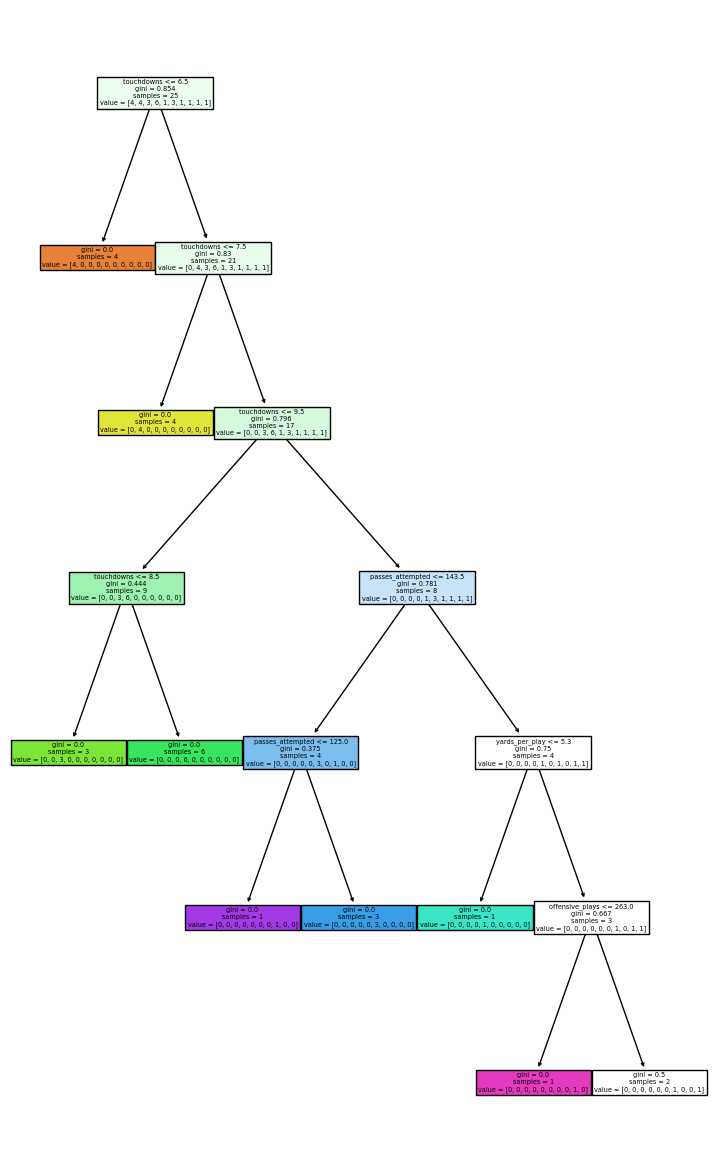

In [22]:
fig = plt.figure(figsize=(9,15))
plot_tree(
        clf,
        feature_names=clf.feature_names_in_,
        filled=True
        
    );

Based on above information, I choose max_depth is 6, and the train set value is 0.96 and the test value is round to 0.86, so this is not overfitting in this model. Also in the above Decission chart, we can see the different situation's result. Like touchdowns less or equal than 9.5,etc.

## Using K-Neighbors to predict

This is the extra part of Math10, because this classifier is supervised and make classificartions, predictions about individual data point in a group, so I think it is good for analyze NFL datas. Even though peopla call it "lazy".

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [25]:
X = w4[["rushing_attempts","passes_attempted"]]
y = w4["points_scored"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.6, random_state=4)

In [30]:
clf2 = KNeighborsClassifier()
clf2.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
w4_1["pred"] = clf2.predict(X_scaled)
clf2.fit(X_train, y_train)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


KNeighborsClassifier()

In [52]:
w4_1

,points_scored,yards_per_play,offensive_plays,passes_completed,passes_attempted,touchdowns,pred_1,predict,pred
0,140,6.5,269,93,152,18,57,57,57
1,129,6.0,257,97,147,15,57,57,57
2,119,6.2,230,76,117,14,66,66,66
3,115,6.1,285,82,123,14,105,105,105
4,114,6.0,275,113,170,12,57,57,57
5,105,5.5,281,82,127,11,74,74,74
6,105,5.4,250,88,134,11,66,66,66
7,103,5.9,236,57,98,9,64,64,64
8,98,6.4,227,94,140,11,73,73,73
9,96,5.6,256,95,155,8,57,57,57


In [60]:
c3 = alt.Chart(w4_1).mark_circle().encode(
    x="passes_completed",
    y="passes_attempted",
    color=alt.Color("pred", title="rank"),
    tooltip = ('passes_attempted','touchdowns','points_scored','yards_per_play','passes_completed')
).properties(
    title="Passing",
    width=400,
    height=400,
)
c3


alt.Chart(...)

Using KNeighborsCalssifier and altair chart to show the performance of passing in each team, except two teams, which is almost 50% passing complete on the left side, and another one 193 passes attempts and 111 completed, high passes, high rate of success. other team has the similar rate of passing success. We can see there is a line in the graph.

## Summary
In the final project, I use altair chart, Decission Tree and KNeighbor classifier to analyze the NFL teams offense performance. Also, using Decission Tree to make sure whtether it is overfitting or not which is very important in machine learning. 

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?
https://www.kaggle.com/datasets/kendallgillies/nflstatistics

* List any other references that you found helpful.
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8a7d75c-60f8-4572-9513-6dbb4ae3d40d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>